# Bounded confidence model with networkx graph with all same weights

In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Defining the parameters
We first define some parameters such as the number of agents n, the number of connections per agent m, the probability of rewiring a connection p, the number of time steps tmax, and the confidence threshold alpha.

In [24]:
# Graph Parameters
n = 50 # number of agents
tmax = 5000

# Bounded confidence model parameters
epsilon = 0.25 # Tolerance to differing opinions
mew = 0.01 # Adjustment rate

num_simulation = 500

# Generating Graph
We then generate an initial graph using the complete_graph function from NetworkX and assign random initial opinions to each agent.

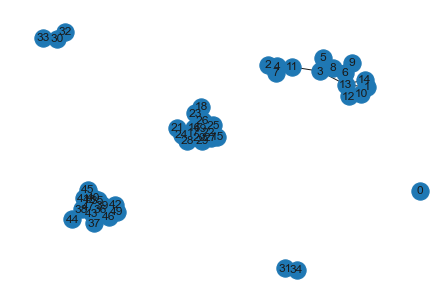

In [25]:
sizes = [15,15,5,15]
probs = [
    [0.25,0.0,0.0,0.0],
    [0.0,0.33,0.0,0.0],
    [0.0,0.0,0.5,0.0],
    [0.0,0.0,0.0,0.33]]
G = nx.stochastic_block_model(sizes,probs,seed=0)
nx.draw(G,with_labels=True)

# Simulation Loop
The simulation loop goes through each node at every time step and checks whether its opinion is within the confidence threshold of the average opinion of its neighbors. If so, the agent updates its opinion to the average. The opinions are changed at the end of each loop.

In [26]:
def simulate_loop(G, opinions, epsilon, mew, iterations):
    for t in range(iterations):
        
        new_opinions = np.ndarray.copy(opinions)
        
        for i in range(G.number_of_nodes()):
    
            # Get opinions of neighbors
            neighbors = list(G.neighbors(i))
            
            # Test if any neighbors are within tolerance and update opinions
            for j in neighbors:
                if abs(opinions[i] - opinions[j]) < epsilon:
                    new_opinions[i] = opinions[i] - mew * (opinions[i] - opinions[j])
                    new_opinions[j] = opinions[j] + mew * (opinions[i] - opinions[j])
        
        #Break if converged
        if(np.allclose(opinions,new_opinions)):
            print(t)
            break
        
        opinions = new_opinions
    return opinions

In [27]:
simulate_loop(G,np.random.uniform(-1.0,1.0,n),epsilon,mew,tmax)

972


array([-0.40139581,  0.73594976,  0.80251254, -0.39929321,  0.80252   ,
        0.72698053,  0.73593934, -0.73912579,  0.22405935,  0.73595226,
       -0.01411621,  0.80252   ,  0.73593652,  0.73593652, -0.81398149,
        0.76003078, -0.15608114, -0.47325311,  0.75911115,  0.25196445,
        0.25198754, -0.15607848, -0.15608114, -0.38252266,  0.25197482,
        0.76001661,  0.75986631,  0.76003149,  0.25197482,  0.76003149,
       -0.43244002,  0.15985034,  0.39994861,  0.16690832,  0.15985034,
        0.40975047,  0.40986812, -0.52472758,  0.40985023,  0.40986963,
        0.40984617, -0.48718372,  0.98269241,  0.88480383, -0.78298802,
        0.68753649, -0.50115465,  0.88480383, -0.98011038,  0.40986963])

# Clustering

To understand clustering, the model must be simulated multiple times and compared. The function generate_opinions creates a dictionary which has simulation number as key and list of opinions as value.

In [28]:
def generate_opinions(G, epsilon, mew, iterations, num_simulations):
    results = [ np.random.uniform(-1.0,1.0,n) for _ in range(num_simulations)]

    for i in range(num_simulations):
        results[i] = simulate_loop(G,results[i], epsilon, mew, iterations)
    
    return results


In [29]:
res = generate_opinions(G, epsilon, mew, tmax, num_simulation)

887
995
922
887
853
854
555
862
925
1255
889
722
869
702
1074
1238
831
847
846
1116
1395
945
573
756
790
1212
727
1215
653
1052
814
992
859
892
667
878
939
730
945
834
538
875
1260
921
1081
852
902
942
981
864
732
745
863
838
680
850
836
1157
990
630
851
877
873
617
999
942
537
948
990
1260
589
773
712
987
787
1084
964
985
799
889
925
871
866
808
1069
908
954
1044
826
828
1026
836
1104
858
857
787
765
613
867
952
901
698
752
752
1076
1081
1084
963
1201
893
976
1100
1222
948
1283
920
945
893
665
928
731
751
755
944
889
906
684
954
803
718
929
961
1197
1011
1027
870
1050
843
635
699
1435
849
795
831
778
856
1024
864
872
1014
1417
624
891
818
799
681
758
1001
883
819
907
996
942
838
1152
938
803
933
904
1028
785
1127
843
1039
830
1154
782
786
991
739
796
1043
1042
867
915
925
786
762
688
793
704
912
884
760
844
1011
917
727
936
818
1009
1002
599
786
852
858
952
1046
686
743
1001
604
786
947
814
982
601
1313
965
1050
1070
1003
1170
773
664
945
1034
845
996
944
993
752
822
813
951
778
1063


# Data processing


In [30]:
import pandas as pd

df = pd.DataFrame(res)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.783474,0.468639,0.337603,0.669154,0.320479,0.108264,-0.792386,-0.305978,0.669154,0.627511,...,0.107451,-0.614393,-0.615096,-0.724175,0.364300,-0.990441,0.107397,0.791441,0.762933,0.846680
1,0.142548,0.683060,0.344383,-0.058908,0.681691,0.568089,-0.770290,-0.587172,-0.058968,0.711763,...,-0.805518,0.402279,0.710326,-0.805520,-0.805520,-0.431192,0.064819,0.183358,0.402279,0.064819
2,0.232366,0.990282,-0.401427,0.462900,0.228817,0.766597,0.178055,0.655359,-0.822680,0.178055,...,-0.410057,0.925561,-0.094594,-0.409875,-0.409875,0.744318,0.627343,0.071836,0.404634,-0.423437
3,-0.156702,0.940519,0.532182,-0.291967,0.434042,0.722711,-0.496685,-0.718005,0.704842,0.052547,...,0.066213,0.066225,0.376455,0.779377,0.779353,0.376431,0.779407,0.779377,0.066225,-0.913990
4,-0.224426,0.938165,-0.347799,0.778239,0.778278,-0.415697,-0.744870,0.778267,-0.063511,0.859752,...,0.411369,-0.618648,-0.618592,-0.682937,-0.682937,-0.618650,-0.120852,0.923303,-0.949933,0.909230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.532185,-0.956936,-0.306850,-0.474029,-0.898743,-0.474049,0.635187,-0.241733,-0.474029,0.635167,...,0.094332,0.094237,0.237878,0.094339,0.963703,0.905725,0.878958,0.094339,-0.831005,-0.406126
496,0.622372,-0.894461,0.806132,-0.428153,0.501570,0.698710,-0.714424,-0.772853,0.354025,0.117955,...,0.192879,0.654086,0.775108,0.721002,-0.268682,0.654073,0.721002,0.192879,0.654073,-0.296463
497,0.399847,0.216815,0.143384,0.818850,-0.738718,-0.192019,0.818902,0.894328,0.196799,0.818922,...,0.407089,0.061662,0.213912,-0.239803,0.643202,0.678427,-0.252338,-0.239803,-0.882800,-0.252338
498,0.042514,0.228273,0.069645,0.599939,-0.603235,-0.606926,0.105722,-0.151272,-0.646815,0.854098,...,0.219236,-0.235294,-0.780259,-0.445761,0.667674,-0.235318,0.995238,-0.445761,-0.235318,0.443820


In [31]:
buckets = np.arange(-1, 1 + 0.1, 0.1)

groups = pd.cut(df.iloc[0], buckets, labels=buckets[:-1])

groups

/opt/homebrew/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0     0.7
1     0.4
2     0.3
3     0.6
4     0.3
5     0.1
6    -0.8
7    -0.4
8     0.6
9     0.6
10    0.3
11   -0.9
12    0.5
13   -0.8
14   -0.8
15    0.7
16    0.7
17    0.1
18    0.7
19    0.1
20   -0.9
21   -0.2
22    0.7
23   -0.8
24    0.7
25    0.7
26    0.1
27   -0.6
28    0.1
29   -0.9
30    0.9
31   -0.2
32   -0.6
33   -0.3
34   -1.0
35   -0.7
36   -0.7
37   -0.8
38    0.6
39    0.1
40    0.1
41   -0.7
42   -0.7
43   -0.8
44    0.3
45   -1.0
46    0.1
47    0.7
48    0.7
49    0.8
Name: 0, dtype: category
Categories (20, float64): [-1.0 < -0.9 < -0.8 < -0.7 ... 0.6 < 0.7 < 0.8 < 0.9]

The clusters data frame here is a table. the rows indicate the the nodes. the columns are simulation number.

In [32]:
clusters = pd.DataFrame([pd.cut(df.iloc[i], buckets, labels=buckets[:-1]) for i in range(num_simulation)])

In [33]:
clusters = clusters.T
clusters

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.7,1.000000e-01,2.000000e-01,-2.000000e-01,-0.3,0.1,2.000000e-01,6.000000e-01,-2.000000e-01,-3.000000e-01,...,2.000000e-01,0.7,-2.000000e-01,-0.5,-3.000000e-01,5.000000e-01,0.6,3.000000e-01,-2.220446e-16,0.3
1,0.4,6.000000e-01,9.000000e-01,9.000000e-01,0.9,-0.7,-4.000000e-01,1.000000e-01,-6.000000e-01,-4.000000e-01,...,5.000000e-01,-0.6,4.000000e-01,-0.4,8.000000e-01,-1.000000e+00,-0.9,2.000000e-01,2.000000e-01,0.4
2,0.3,3.000000e-01,-5.000000e-01,5.000000e-01,-0.4,-0.7,-1.000000e-01,-2.000000e-01,-4.000000e-01,-2.000000e-01,...,1.000000e-01,-0.9,9.000000e-01,0.7,-7.000000e-01,-4.000000e-01,0.8,1.000000e-01,-2.220446e-16,0.7
3,0.6,-1.000000e-01,4.000000e-01,-3.000000e-01,0.7,0.4,-8.000000e-01,-6.000000e-01,8.000000e-01,-6.000000e-01,...,-2.220446e-16,-0.2,8.000000e-01,0.4,-3.000000e-01,-5.000000e-01,-0.5,8.000000e-01,5.000000e-01,-0.4
4,0.3,6.000000e-01,2.000000e-01,4.000000e-01,0.7,-1.0,-9.000000e-01,-8.000000e-01,7.000000e-01,-2.000000e-01,...,-8.000000e-01,0.4,6.000000e-01,0.7,-4.000000e-01,-9.000000e-01,0.5,-8.000000e-01,-7.000000e-01,-0.9
5,0.1,5.000000e-01,7.000000e-01,7.000000e-01,-0.5,-0.1,-4.000000e-01,-6.000000e-01,-4.000000e-01,4.000000e-01,...,-7.000000e-01,-0.2,-8.000000e-01,0.4,-1.000000e+00,-5.000000e-01,0.6,-2.000000e-01,-7.000000e-01,-0.4
6,-0.8,-8.000000e-01,1.000000e-01,-5.000000e-01,-0.8,0.4,-8.000000e-01,7.000000e-01,9.000000e-01,-6.000000e-01,...,7.000000e-01,0.8,-2.220446e-16,-0.5,7.000000e-01,6.000000e-01,-0.8,8.000000e-01,1.000000e-01,-0.1
7,-0.4,-6.000000e-01,6.000000e-01,-8.000000e-01,0.7,-1.0,5.000000e-01,-8.000000e-01,7.000000e-01,6.000000e-01,...,3.000000e-01,0.4,4.000000e-01,-0.2,-7.000000e-01,-3.000000e-01,-0.8,8.000000e-01,-2.000000e-01,-0.9
8,0.6,-1.000000e-01,-9.000000e-01,7.000000e-01,-0.1,-0.8,-2.220446e-16,-2.000000e-01,-5.000000e-01,-2.000000e-01,...,4.000000e-01,-0.7,-2.220446e-16,-0.9,4.000000e-01,-5.000000e-01,0.3,1.000000e-01,-7.000000e-01,-0.1
9,0.6,7.000000e-01,1.000000e-01,-2.220446e-16,0.8,0.4,-8.000000e-01,-2.000000e-01,-2.000000e-01,-1.000000e+00,...,7.000000e-01,-0.6,4.000000e-01,0.4,-8.000000e-01,6.000000e-01,0.1,8.000000e-01,8.000000e-01,-0.9


In [34]:
clusters.index[clusters[1] == clusters.iloc[0][1]].tolist()


[0, 18, 35, 47]

In [35]:
clusters_list = {}
for i in range(num_simulation):
    clusters_list[i] = []
    for j in range(n):
        added = False
        for cluster in clusters_list[i]:
            if(j in cluster):
                added = True
                break
        if(not added):
            clusters_list[i].append(clusters.index[clusters[i] == clusters.iloc[j][i]].tolist())

clusters_list

{0: [[0, 15, 16, 18, 22, 24, 25, 47, 48],
  [1],
  [2, 4, 10, 44],
  [3, 8, 9, 38],
  [5, 17, 19, 26, 28, 39, 40, 46],
  [6, 13, 14, 23, 37, 43],
  [7],
  [11, 20, 29],
  [12],
  [21, 31],
  [27, 32],
  [30],
  [33],
  [34, 45],
  [35, 36, 41, 42],
  [49]],
 1: [[0, 18, 35, 47],
  [1, 4],
  [2],
  [3, 8, 12, 13],
  [5, 28],
  [6],
  [7, 21, 24],
  [9, 42],
  [10, 16, 17, 23, 29],
  [11, 14, 36],
  [15, 19, 20, 25, 26, 27],
  [22, 30, 32, 39, 41, 48],
  [31, 34, 37, 46, 49],
  [33, 38, 40, 43, 44],
  [45]],
 2: [[0, 4, 18],
  [1, 41],
  [2, 11, 34, 35, 37, 38, 40, 43, 44, 49],
  [3, 48],
  [5, 19, 23, 36, 45],
  [6, 9, 39],
  [7, 21, 29, 30, 31, 46],
  [8, 26, 33],
  [10],
  [12, 15, 22, 42],
  [13],
  [14, 16, 24],
  [17, 27],
  [20, 28],
  [25, 47],
  [32]],
 3: [[0, 25, 27, 29],
  [1],
  [2],
  [3],
  [4],
  [5, 8, 16, 20, 21, 24, 43, 44, 46, 47],
  [6, 10, 32],
  [7],
  [9, 36, 38, 40, 41, 48],
  [11, 12],
  [13, 28],
  [14],
  [15, 17, 19, 22, 26],
  [18, 23],
  [30, 33, 35, 42, 45

In [36]:
cluster_count = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        for k in range(num_simulation):
            for cluster in clusters_list[k]:
                if(i==j):
                    continue
                if i in cluster and j in cluster:
                    cluster_count[i][j] +=1

cluster_count

array([[ 0., 31., 17., ..., 28., 26., 20.],
       [31.,  0., 31., ..., 34., 26., 24.],
       [17., 31.,  0., ..., 29., 22., 27.],
       ...,
       [28., 34., 29., ...,  0., 40., 54.],
       [26., 26., 22., ..., 40.,  0., 40.],
       [20., 24., 27., ..., 54., 40.,  0.]])

In this implementation, the sort_table function takes as input a symmetric n x n numpy array table and returns the sorted version of the table where nodes that fall together are close to each other. To achieve this, we first compute the linkage matrix using the linkage function from the scipy.cluster.hierarchy module with the 'ward' method. This method minimizes the variance of the distances between the clusters being merged.

Then, we use the dendrogram function to obtain the order of the rows and columns that will group similar nodes together. 

/var/folders/9t/g7tqgrkx2771q23k4d0cr8xw0000gn/T/ipykernel_31177/532040410.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(cluster_count,method="ward")


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [42.5, 42.5, 72.5, 72.5],
  [25.0, 25.0, 57.5, 57.5],
  [10.0, 10.0, 41.25, 41.25],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [95.0, 95.0, 121.25, 121.25],
  [25.625, 25.625, 108.125, 108.125],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [182.5, 182.5, 212.5, 212.5],
  [160.0, 160.0, 197.5, 197.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [242.5, 242.5, 280.0, 280.0],
  [178.75, 178.75, 261.25, 261.25],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [375.0, 375.0, 385.0, 385.0],
  [360.0, 360.0, 380

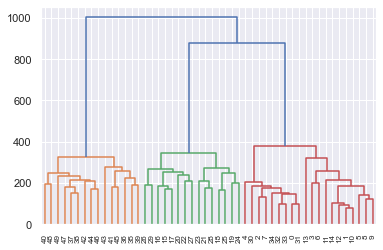

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(cluster_count,method="ward")

dendrogram(linkage_matrix, labels=list(range(len(cluster_count))))




In [38]:
# Sort rows and columns based on clustering
sorted_indices = dendrogram(linkage_matrix, no_plot=True)['leaves']

sorted_clusters = cluster_count[sorted_indices][:,sorted_indices]

# Plots

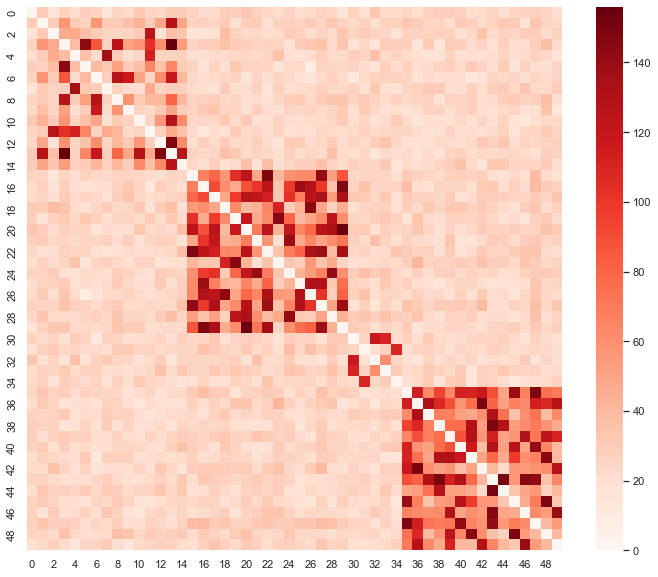

In [39]:
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cluster_count,cmap="Reds")
plt.show()

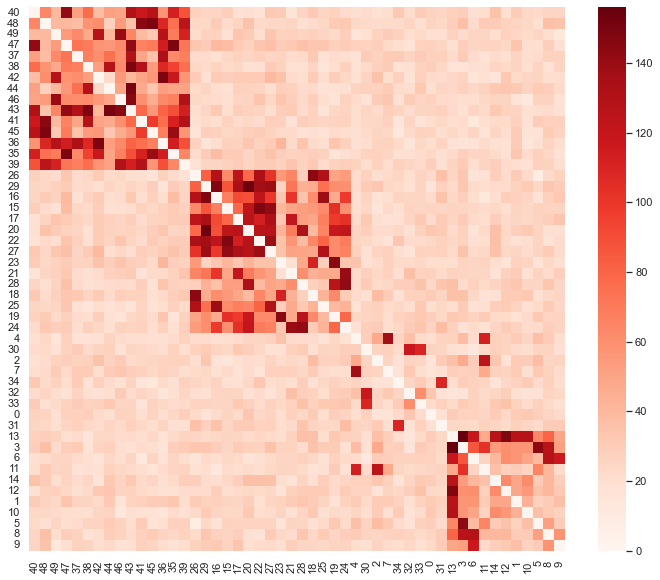

In [40]:
sns.set()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(sorted_clusters,xticklabels=sorted_indices,yticklabels=sorted_indices,cmap="Reds")

plt.show()

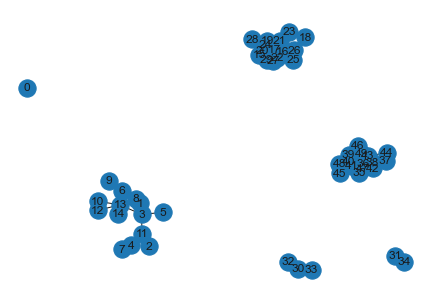

In [41]:
nx.draw(G,with_labels=True)

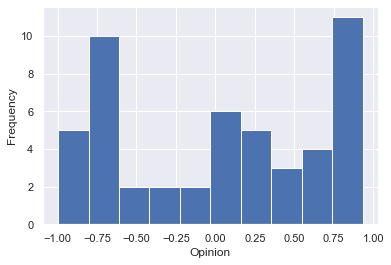

In [42]:
plt.hist(res[0])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()

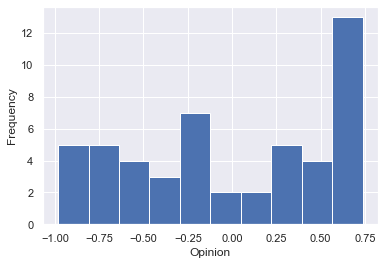

In [43]:
plt.hist(res[5])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()

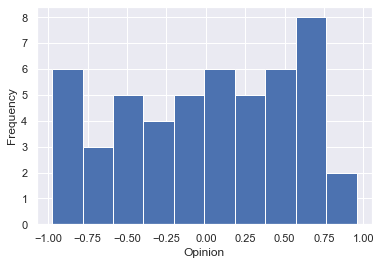

In [44]:
plt.hist(res[80])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()